<a href="https://colab.research.google.com/github/RichardKameri/tydata/blob/main/CreditCardSpending1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARY


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATA SET

In [2]:
# Load the data set
df = pd.read_csv('/content/Credit card transactions - India - Simple.csv')

In [3]:
# display the first few rows to understand the data set
df.head()


,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


CLEAN THE DATA

In [4]:
# check for missing values
df.isnull().sum()

,0
index,0
City,0
Date,0
Card Type,0
Exp Type,0
Gender,0
Amount,0


In [5]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [6]:
# change the Date column from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-6-18b8c6b27b7b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
# check the data info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      26052 non-null  int64         
 1   City       26052 non-null  object        
 2   Date       26052 non-null  datetime64[ns]
 3   Card Type  26052 non-null  object        
 4   Exp Type   26052 non-null  object        
 5   Gender     26052 non-null  object        
 6   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.4+ MB


IDENTIFY THE TOP 10 SPENDING CITIES AND THE 10 LEAST SPENDING CITIES


In [8]:
# Calculate total transaction amount for each city
city_transaction_totals = df.groupby('City')['Amount'].sum().sort_values(ascending=False)

# Identify the top 10 cities with the most and least transactions
most_spending_cities = city_transaction_totals.head(10)
least_spending_cities = city_transaction_totals.tail(10)

# Display the cities
print("Top 10 cities with the most transactions:")
print(most_spending_cities)
print("\nTop 10 cities with the least transactions:")
print(least_spending_cities)


Top 10 cities with the most transactions:
City
Greater Mumbai, India    576751476
Bengaluru, India         572326739
Ahmedabad, India         567794310
Delhi, India             556929212
Kolkata, India           115466943
Lucknow, India           115334476
Chennai, India           114730600
Hyderabad, India         114493477
Surat, India             114486151
Kanpur, India            114370532
Name: Amount, dtype: int64

Top 10 cities with the least transactions:
City
Godhra, India           121637
Rayagada, India         113126
Azamgarh, India         102204
Nalbari, India           95321
Thiruvalla, India        83524
Changanassery, India     30074
Tirur, India             26094
Bahraich, India          24253
Mahbubnagar, India       15458
Fazilka, India           14949
Name: Amount, dtype: int64


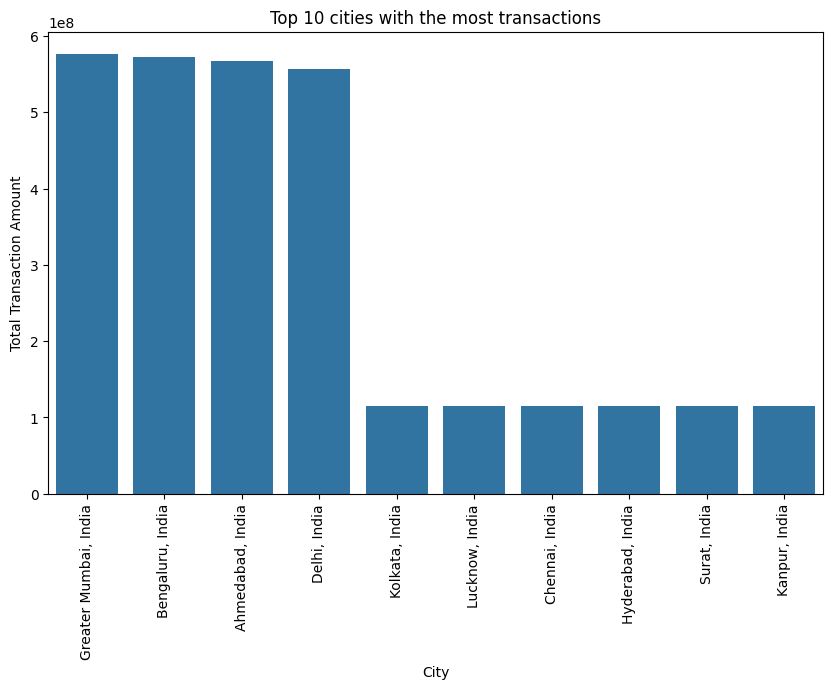

In [9]:
# barplot for the top 10 spending cities
plt.figure(figsize=(10, 6))
sns.barplot(x=most_spending_cities.index, y=most_spending_cities.values)
plt.title('Top 10 cities with the most transactions')
plt.xlabel('City')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)
plt.show()

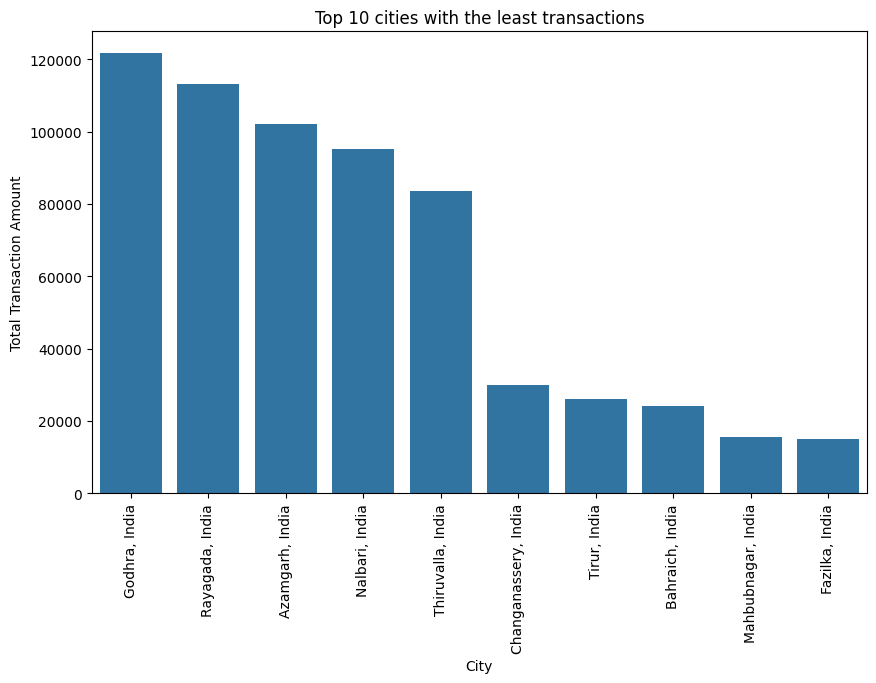

In [10]:
# barplot for the 10 laest spending cities
plt.figure(figsize=(10, 6))
sns.barplot(x=least_spending_cities.index, y=least_spending_cities.values)
plt.title('Top 10 cities with the least transactions')
plt.xlabel('City')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)
plt.show()


MULTIVARIATE ANALYSIS


Distribution of Amount Spent by Gender and Card Type in Most and Least Spending Cities

Trend of Amount Spent Over Time by Gender in Most and Least Spending Cities

Amount Spent by City and Card Type

These box plots show the distribution of amounts spent by gender and card type in the top 10 most and least spending cities, highlighting differences in spending patterns between different categories and cities.

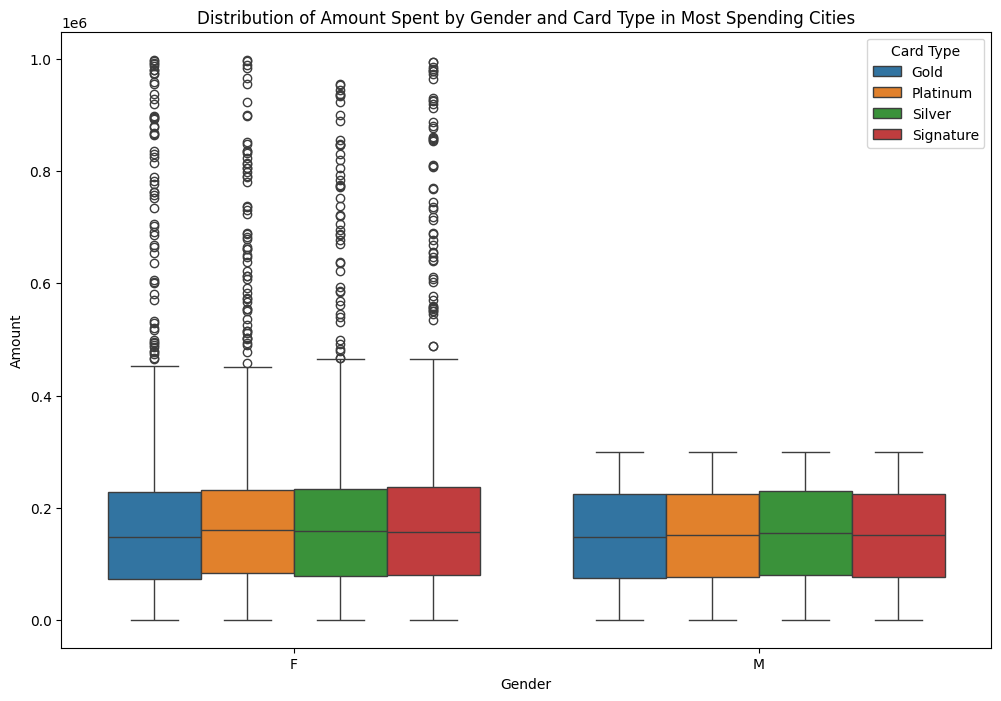

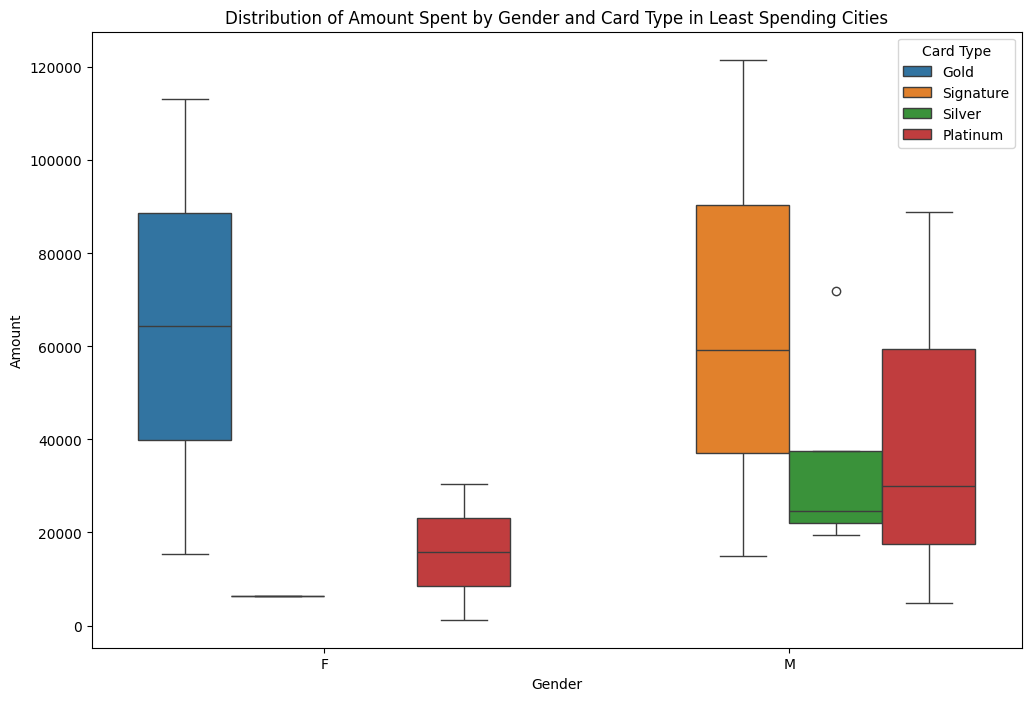

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for the top 10 most and least spending cities
df_most_spending_cities = df[df['City'].isin(most_spending_cities.index)]
df_least_spending_cities = df[df['City'].isin(least_spending_cities.index)]

# Box plot for most spending cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Amount', hue='Card Type', data=df_most_spending_cities)
plt.title('Distribution of Amount Spent by Gender and Card Type in Most Spending Cities')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show()

# Box plot for least spending cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Amount', hue='Card Type', data=df_least_spending_cities)
plt.title('Distribution of Amount Spent by Gender and Card Type in Least Spending Cities')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show()


Trend of Amount Spent Over Time by Gender in Most and Least Spending Cities

These line plots show the trend of total amount spent over time by gender in the top 10 most and least spending cities, helping to identify differences in spending behavior over time.

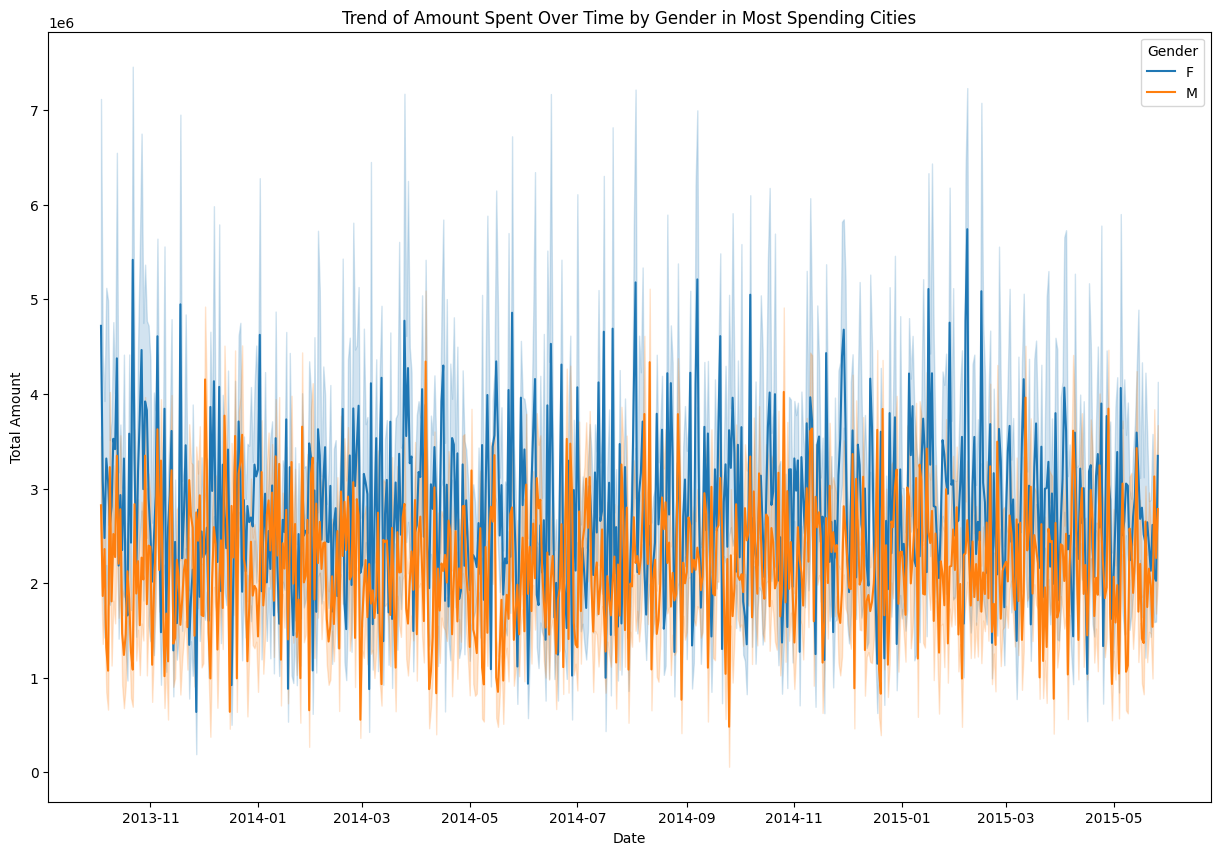

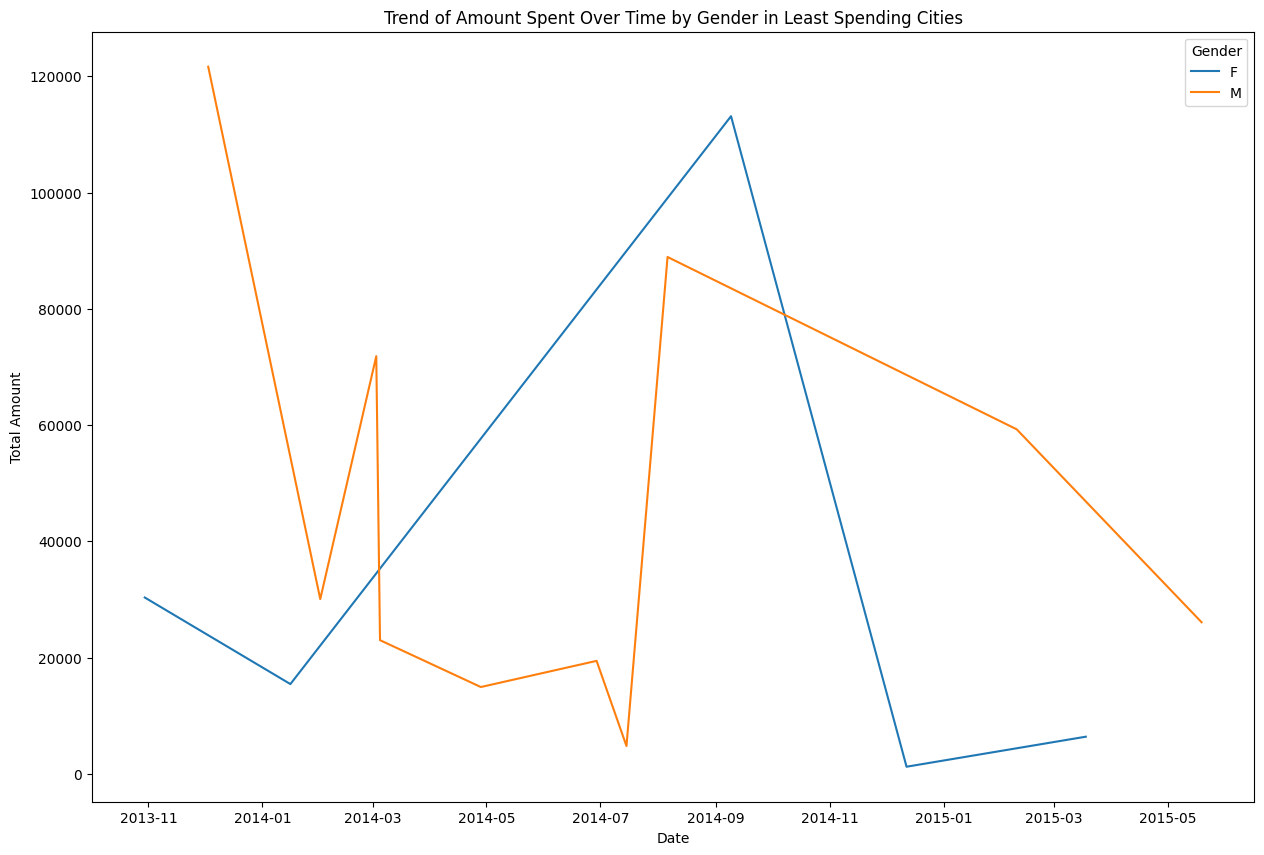

In [12]:
# Line plot for most spending cities
plt.figure(figsize=(15, 10))
sns.lineplot(x='Date', y='Amount', hue='Gender', data=df_most_spending_cities, estimator='sum')
plt.title('Trend of Amount Spent Over Time by Gender in Most Spending Cities')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

# Line plot for least spending cities
plt.figure(figsize=(15, 10))
sns.lineplot(x='Date', y='Amount', hue='Gender', data=df_least_spending_cities, estimator='sum')
plt.title('Trend of Amount Spent Over Time by Gender in Least Spending Cities')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()


Amount Spent by City and Card Type

These bar plots show the total amount spent by city and card type in the top 10 most and least spending cities, highlighting differences in spending across various cities and card types.

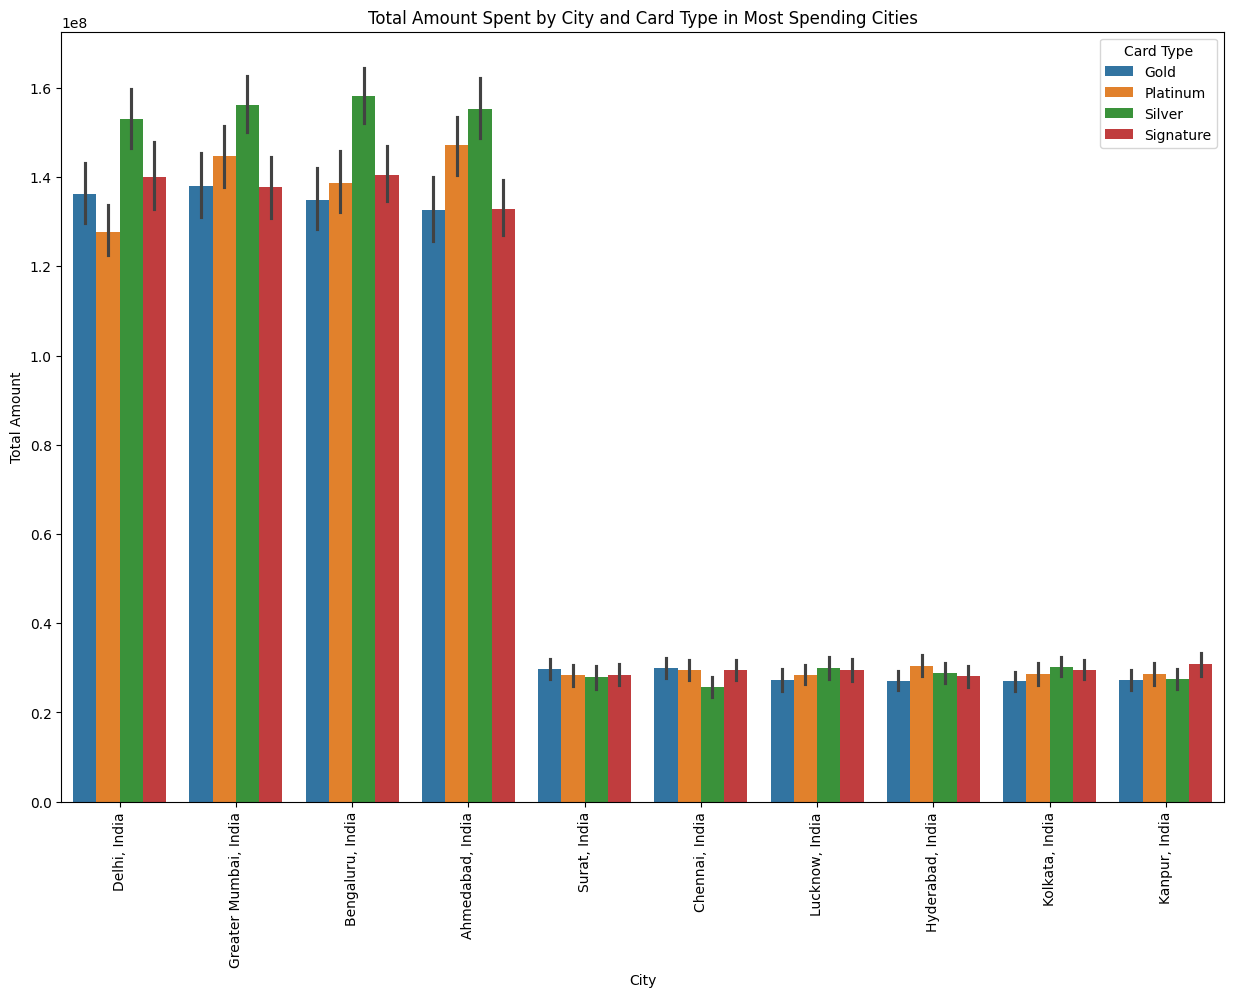

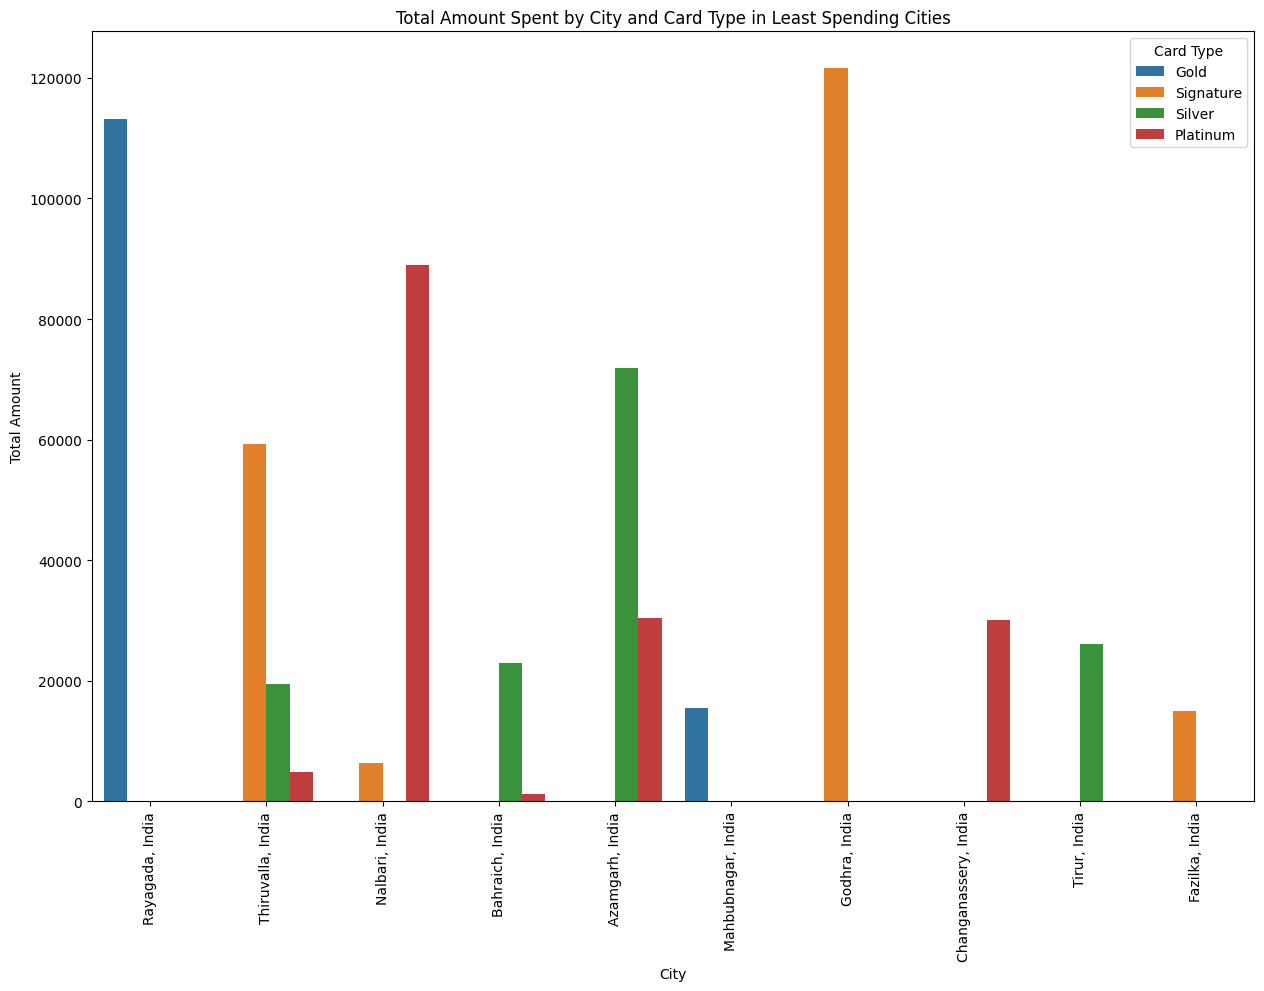

In [13]:
# Bar plot for most spending cities
plt.figure(figsize=(15, 10))
sns.barplot(x='City', y='Amount', hue='Card Type', data=df_most_spending_cities, estimator=sum)
plt.title('Total Amount Spent by City and Card Type in Most Spending Cities')
plt.xlabel('City')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.show()

# Bar plot for least spending cities
plt.figure(figsize=(15, 10))
sns.barplot(x='City', y='Amount', hue='Card Type', data=df_least_spending_cities, estimator=sum)
plt.title('Total Amount Spent by City and Card Type in Least Spending Cities')
plt.xlabel('City')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.show()


Distribution of Amount Spent by Gender and Card Type in Most and Least Spending Cities

These box plots show the distribution of amounts spent by gender and card type in the top 10 most and least spending cities, highlighting differences in spending patterns between different categories and cities. This analysis can help identify trends such as which gender or card type is associated with higher spending, providing insights into what drives product sales.

In [14]:
import plotly.express as px

# Filter the data for the top 10 most and least spending cities
df_most_spending_cities = df[df['City'].isin(most_spending_cities.index)]
df_least_spending_cities = df[df['City'].isin(least_spending_cities.index)]

# Box plot for most spending cities
fig_most = px.box(df_most_spending_cities, x='Gender', y='Amount', color='Card Type', title='Distribution of Amount Spent by Gender and Card Type in Most Spending Cities')
fig_most.show()

# Box plot for least spending cities
fig_least = px.box(df_least_spending_cities, x='Gender', y='Amount', color='Card Type', title='Distribution of Amount Spent by Gender and Card Type in Least Spending Cities')
fig_least.show()


Amount Spent by City and Card Type

These bar plots show the total amount spent by city and card type in the top 10 most and least spending cities, highlighting differences in spending across various cities and card types. This analysis can help identify which cities and card types contribute the most to product sales, providing insights into what drives sales.

In [15]:
# Bar plot for most spending cities
fig_most_city_cardtype = px.bar(df_most_spending_cities, x='City', y='Amount', color='Card Type', title='Total Amount Spent by City and Card Type in Most Spending Cities', barmode='group')
fig_most_city_cardtype.show()

# Bar plot for least spending cities
fig_least_city_cardtype = px.bar(df_least_spending_cities, x='City', y='Amount', color='Card Type', title='Total Amount Spent by City and Card Type in Least Spending Cities', barmode='group')
fig_least_city_cardtype.show()


Trend of Amount Spent Over Time by Gender in Most and Least Spending Cities

In [16]:
# scatter plot for most spending cities
fig_most_scatter = px.scatter(df_most_spending_cities, x='Date', y='Amount', color='Gender', title='Trend of Amount Spent Over Time by Gender in Most Spending Cities')
fig_most_scatter.show()

In [17]:
# scatter plot for the least spending cities
fig_least_scatter = px.scatter(df_least_spending_cities, x='Date', y='Amount', color='Gender', title='Trend of Amount Spent Over Time by Gender in Least Spending Cities')
fig_least_scatter.show()

In [18]:
import plotly.express as px

# Filter the data for the top 10 most and least spending cities
df_most_spending_cities = df[df['City'].isin(most_spending_cities.index)]
df_least_spending_cities = df[df['City'].isin(least_spending_cities.index)]

# Box plot for most spending cities
fig_most = px.box(df_most_spending_cities,
                  x='Gender',
                  y='Amount',
                  color='Card Type',
                  title='Distribution of Amount Spent by Gender and Card Type in Most Spending Cities')

# Update layout to have a white background
fig_most.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_font_size=20,
    xaxis_title="Gender",
    yaxis_title="Amount",
    xaxis_tickangle=-45,
    legend_title="Card Type",
    margin=dict(l=100, r=50, t=50, b=100),
    legend=dict(
        x=1,
        y=1,
        traceorder='normal',
        font=dict(size=12)
    )
)

fig_most.show()

# Box plot for least spending cities
fig_least = px.box(df_least_spending_cities,
                   x='Gender',
                   y='Amount',
                   color='Card Type',
                   title='Distribution of Amount Spent by Gender and Card Type in Least Spending Cities')

# Update layout to have a white background
fig_least.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_font_size=20,
    xaxis_title="Gender",
    yaxis_title="Amount",
    xaxis_tickangle=-45,
    legend_title="Card Type",
    margin=dict(l=100, r=50, t=50, b=100),
    legend=dict(
        x=1,
        y=1,
        traceorder='normal',
        font=dict(size=12)
    )
)

fig_least.show()


In [20]:
import plotly.express as px

# Scatter plot for most spending cities
fig_most_scatter = px.scatter(df_most_spending_cities,
                              x='Date',
                              y='Amount',
                              color='Gender',
                              title='Trend of Amount Spent Over Time by Gender in Most Spending Cities')

# Update layout to have a white background
fig_most_scatter.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_font_size=20,
    xaxis_title="Date",
    yaxis_title="Amount",
    xaxis_tickangle=-45,
    legend_title="Gender",
    margin=dict(l=100, r=50, t=50, b=100),
    legend=dict(
        x=1,
        y=1,
        traceorder='normal',
        font=dict(size=12)
    )
)

fig_most_scatter.show()


In [21]:
import plotly.express as px

# Scatter plot for the least spending cities
fig_least_scatter = px.scatter(df_least_spending_cities,
                               x='Date',
                               y='Amount',
                               color='Gender',
                               title='Trend of Amount Spent Over Time by Gender in Least Spending Cities')

# Update layout to have a white background
fig_least_scatter.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_font_size=20,
    xaxis_title="Date",
    yaxis_title="Amount",
    xaxis_tickangle=-45,
    legend_title="Gender",
    margin=dict(l=100, r=50, t=50, b=100),
    legend=dict(
        x=1,
        y=1,
        traceorder='normal',
        font=dict(size=12)
    )
)

fig_least_scatter.show()


In [22]:
import plotly.express as px

# Bar plot for most spending cities
fig_most_city_cardtype = px.bar(df_most_spending_cities,
                                x='City',
                                y='Amount',
                                color='Card Type',
                                title='Total Amount Spent by City and Card Type in Most Spending Cities',
                                barmode='group')

# Update layout to have a white background
fig_most_city_cardtype.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_font_size=20,
    xaxis_title="City",
    yaxis_title="Total Amount Spent",
    xaxis_tickangle=-45,
    legend_title="Card Type",
    margin=dict(l=100, r=50, t=50, b=100),
    legend=dict(
        x=1,
        y=1,
        traceorder='normal',
        font=dict(size=12)
    )
)

fig_most_city_cardtype.show()

# Bar plot for least spending cities
fig_least_city_cardtype = px.bar(df_least_spending_cities,
                                 x='City',
                                 y='Amount',
                                 color='Card Type',
                                 title='Total Amount Spent by City and Card Type in Least Spending Cities',
                                 barmode='group')

# Update layout to have a white background
fig_least_city_cardtype.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_font_size=20,
    xaxis_title="City",
    yaxis_title="Total Amount Spent",
    xaxis_tickangle=-45,
    legend_title="Card Type",
    margin=dict(l=100, r=50, t=50, b=100),
    legend=dict(
        x=1,
        y=1,
        traceorder='normal',
        font=dict(size=12)
    )
)

fig_least_city_cardtype.show()


Conclusion
In this project, we:

Loaded the Data: Imported the dataset and displayed the first few rows.

Cleaned the Data: Handled missing values, removed duplicates, and corrected data types.

Identified Most and Least Spending Cities: Determined the top 10 cities with the most and least credit card transactions.

Performed Multivariate Analysis:

Box Plot: Visualized the distribution of amount spent by gender and card type in the top 10 most and least spending cities.

Line Plot: Analyzed the trend of amount spent over time by gender in the top 10 most and least spending cities.

Bar Plot: Compared the amount spent by city and card type in the top 10 most and least spending cities.

INSIGHTS AND PREDICTIONS


Story the Data is Telling Us:

The spending behavior varies significantly across different cities, genders, and card types.

Certain cities have higher spending, indicating more affluent or active consumer bases.

Seasonal and temporal spending trends are evident, with fluctuations in spending over time.

Key Variables:

City: Determines the geographic location of spending.

Amount: Represents the transaction value.

Gender and Card Type: Show spending patterns across different demographics and payment methods.

Interactions Between Variables:

City and Amount: Highlights geographic differences in spending.

Gender and Amount: Shows differences in spending behavior between males and females.

Card Type and Amount: Reveals preferred payment methods and their impact on spending.

Predictions and Insights:

Identify High-Value Markets: Focus on cities with higher spending for targeted marketing and promotions.

Understand Customer Preferences: Analyze spending patterns by gender and card type to tailor products and services.

Seasonal Promotions: Use temporal spending trends to launch seasonal promotions and increase sales.

These visualizations and analyses provide valuable insights into the credit card spending habits in India, helping to identify key drivers of product sales and potential reasons for customer attrition.